In [1]:

import pandas as pd
import json
from pandas.io.json import json_normalize  
import numpy as np
from tabulate import tabulate

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
def stats_analysis(dft):
    df2, df3 = dft
#     df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)
#     df3 = df2.loc[~df2.index.str.contains("None")]
    # extract time_access dict to data fram
    df_time_access = pd.DataFrame(df3.ta.values.tolist(), index=df3.index.values)
    df_time_access = df_time_access.fillna(0)
    
    # counts accesses to edges
    counts = df_time_access.values.flatten()
#     counts2 = counts[(counts>0) & (counts<120)]
    counts2 = counts[(counts>0)]
    
    ratios = []
    cl = len(counts2)
    for i in range(1, 11):
        ratios.append(len(counts2[counts2==i])/cl)
        
        
    step_groupings = []
    cs = sum(counts2)
    for i in range(0, 21):
        step_groupings.append((i, sum(counts2[counts2>i])/cs))
        
    step_groupings = np.array(step_groupings)
    l1, l2 = zip(*step_groupings)
    print("How many edges had more than X visits in the same step")
    print(tabulate(step_groupings))
    
    
    step_groupings_pd = pd.DataFrame()
    step_groupings_pd['bound'] = l1
    step_groupings_pd['fraction'] = l2

    print("avg per step")
    print(np.average(counts2))
    
    
    print("median per step")
    print(np.median(counts2))
    
    plt.plot(step_groupings_pd['bound'], step_groupings_pd['fraction'])
    plt.xlabel("visits per step")
    plt.ylabel("fraction of total visits")
    plt.show()
    
    
    plt.bar(range(1,11), np.array(ratios))
    plt.xlabel("traversals per step")
    plt.ylabel("fraction of total traversals")
    plt.show()
    
    
    plt.hist(counts2, bins=int(max(counts2)))
    plt.xlabel("traversals per step")
    plt.ylabel("count")
    plt.show()
    
    
    plt.plot(df2.groupby('sn').mean()['c'])
    plt.xlabel("count of traversals")
    plt.ylabel("source node neighbors")
    plt.show()
    
    
    count_mean = df2.groupby('sn').mean()['c']
    count_mean_limit_200 = count_mean[count_mean.index < 200]
    count_mean_limit_50 = count_mean[count_mean.index < 50]
    count_mean_limit_10 = count_mean[count_mean.index < 10]
    
    
    plt.plot(count_mean_limit_200)
    plt.title("count_mean_limit_200")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    
    plt.plot(count_mean_limit_50)
    plt.title("count_mean_limit_50")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    
    plt.plot(count_mean_limit_10)
    plt.title("count_mean_limit_10")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    tn_count = df2.groupby('tn').mean()['c']
    plt.plot(tn_count)
    plt.title("target count")
    plt.ylabel("count of traversals")
    plt.xlabel("target node neighbors")
    plt.show()
    
    plt.plot(tn_count[tn_count.index < 200])
    plt.title("target count limit 200")
    plt.ylabel("count of traversals")
    plt.xlabel("target node neighbors")
    plt.show()
    
    print("count mean")
    print(df2['c'].mean())
    print("count max")
    print(max(df2['c']))
    
    
    count_groups = df2.groupby('c').size()
    
    groupings_percentages = []
    for i in range(1, max(df2['c']), 5):
        groupings_percentages.append((i, sum(count_groups[count_groups.index >= i])/sum(count_groups)))
    groupings_percentages = np.array(groupings_percentages)
    
    l1, l2 = zip(*groupings_percentages)
    pd_groupings = pd.DataFrame()
    pd_groupings['fraction'] = l2
    pd_groupings['bound'] = l1
    
    pd_groupings_sig = pd_groupings[(pd_groupings['fraction'] > 0.05) & (pd_groupings['fraction'] < 0.95)]
    
    print(tabulate(pd_groupings_sig))
    
    
    plt.plot(pd_groupings_sig['bound'], pd_groupings_sig['fraction'])
    plt.xlabel("visits in total")
    plt.ylabel("fraction on total visits")
    plt.show()
    
        
    
    sn_groups = df2.groupby('sn').size()
    
    groupings_percentages = []
    for i in range(1, max(df2['sn']), 5):
        groupings_percentages.append((i, sum(sn_groups[sn_groups.index >= i])/sum(sn_groups)))
    groupings_percentages = np.array(groupings_percentages)
    
    l1, l2 = zip(*groupings_percentages)
    pd_groupings = pd.DataFrame()
    pd_groupings['fraction'] = l2
    pd_groupings['bound'] = l1
    
    pd_groupings_sig = pd_groupings[(pd_groupings['fraction'] > 0.05) & (pd_groupings['fraction'] < 0.95)]
    
    print(tabulate(pd_groupings_sig))
    
    
    plt.plot(pd_groupings_sig['bound'], pd_groupings_sig['fraction'])
    plt.xlabel("edges on nodes")
    plt.ylabel("fraction of total edges")
    plt.show()
    
    
    plt.plot(df2.groupby('c').size())
    plt.xlabel("visits per edge")
    plt.ylabel("number of occurrences")
    plt.show()
    
    count_groups = df2.groupby('c').size()
    count_groups_500 = count_groups[count_groups < 500]
    count_groups[count_groups < 10]

In [4]:
def stat_analysis2(df):
    
    return df

In [5]:
def read_df(path):
    return pd.read_json(path)

In [58]:
def read_df_series(path):
    import json
    with open(path, 'r') as f:
        data = json.load(f)
        return pd.DataFrame({'data': data})

In [6]:
def extract_stats(df):
    df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)
    return df2, df2.loc[~df2.index.str.contains("None")]

In [53]:
df_edge_32_100_2_0 = read_df("data_exp/bias_edge_32_100_0.json")
df_edge_32_100_2_02 = read_df("data_exp/bias_edge_32_100_0.2.json")
df_edge_32_100_2_04 = read_df("data_exp/bias_edge_32_100_0.4.json")
df_edge_32_100_2_06 = read_df("data_exp/bias_edge_32_100_0.6.json")
df_edge_32_100_2_08 = read_df("data_exp/bias_edge_32_100_0.8.json")

In [ ]:
df_nodes_32_100_2_0 = read_df("data_exp/bias_nodes_32_100_0.json")
df_nodes_32_100_2_02 = read_df("data_exp/bias_nodes_32_100_0.2.json")
df_nodes_32_100_2_04 = read_df("data_exp/bias_nodes_32_100_0.4.json")
df_nodes_32_100_2_06 = read_df("data_exp/bias_nodes_32_100_0.6.json")
df_nodes_32_100_2_08 = read_df("data_exp/bias_nodes_32_100_0.8.json")

In [59]:
df_three_32_100_2_0 = read_df_series("data_exp/three_count_32_100_0.json")
df_three_32_100_2_02 = read_df_series("data_exp/three_count_32_100_0.2.json")
df_three_32_100_2_04 = read_df_series("data_exp/three_count_32_100_0.4.json")
df_three_32_100_2_06 = read_df_series("data_exp/three_count_32_100_0.6.json")
df_three_32_100_2_08 = read_df_series("data_exp/three_count_32_100_0.8.json")

In [60]:
df_four_32_100_2_0 = read_df("data_exp/four_count_32_100_0.json")
df_four_32_100_2_02 = read_df("data_exp/four_count_32_100_0.2.json")
df_four_32_100_2_04 = read_df("data_exp/four_count_32_100_0.4.json")
df_four_32_100_2_06 = read_df("data_exp/four_count_32_100_0.6.json")
df_four_32_100_2_08 = read_df("data_exp/four_count_32_100_0.8.json")

In [63]:
df_edge_32_100_4096_0 = read_df("data_exp/bias_edge_32_100_4096_0.json")
df_edge_32_100_4096_02 = read_df("data_exp/bias_edge_32_100_4096_0.2.json")
df_edge_32_100_4096_04 = read_df("data_exp/bias_edge_32_100_4096_0.4.json")
df_edge_32_100_4096_06 = read_df("data_exp/bias_edge_32_100_4096_0.6.json")
df_edge_32_100_4096_08 = read_df("data_exp/bias_edge_32_100_4096_0.8.json")

In [64]:
df_edge_32_100_16_0 = read_df("data_exp/bias_edge_32_100_16_0.json")
df_edge_32_100_16_02 = read_df("data_exp/bias_edge_32_100_16_0.2.json")
df_edge_32_100_16_04 = read_df("data_exp/bias_edge_32_100_16_0.4.json")
df_edge_32_100_16_06 = read_df("data_exp/bias_edge_32_100_16_0.6.json")
df_edge_32_100_16_08 = read_df("data_exp/bias_edge_32_100_16_0.8.json")

In [65]:
df_edge_32_100_2_0s = extract_stats(df_edge_32_100_2_0)
df_edge_32_100_2_02s = extract_stats(df_edge_32_100_2_02)
df_edge_32_100_2_04s = extract_stats(df_edge_32_100_2_04)
df_edge_32_100_2_06s = extract_stats(df_edge_32_100_2_06)
df_edge_32_100_2_08s = extract_stats(df_edge_32_100_2_08)

How many edges had more than X visits in the same step
--  -----------
 0  1
 1  0.0185759
 2  0.00722689
 3  0.00482642
 4  0.00345934
 5  0.00261962
 6  0.00206483
 7  0.00168242
 8  0.00139632
 9  0.00117496
10  0.00100506
11  0.000887431
12  0.000780497
13  0.000692455
14  0.000604294
15  0.000541916
16  0.000473479
17  0.000416923
18  0.000363456
19  0.000334109
20  0.000305593
--  -----------
avg per step
1.0100616399130737
median per step
1.0


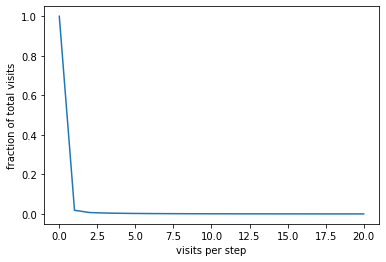

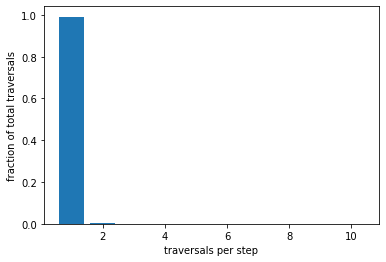

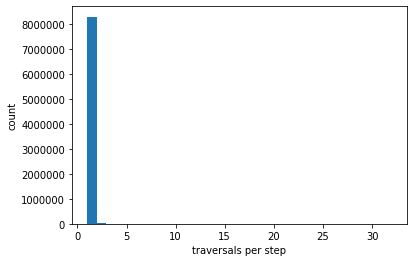

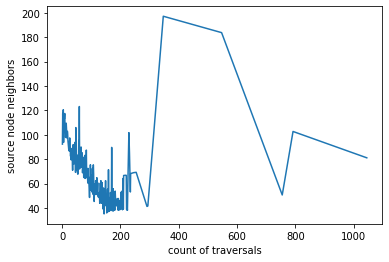

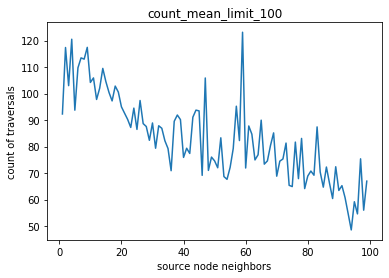

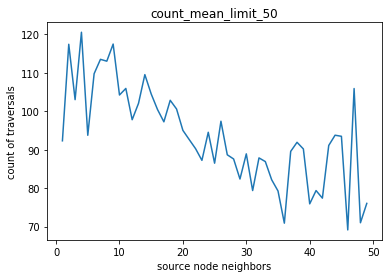

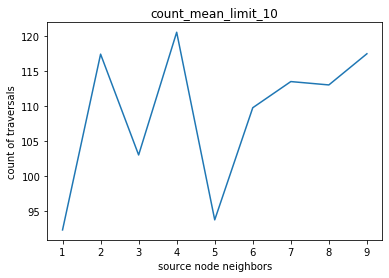

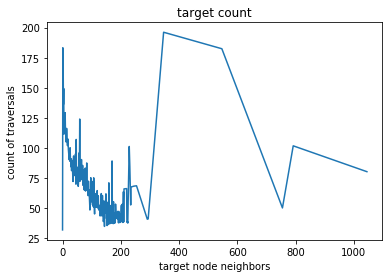

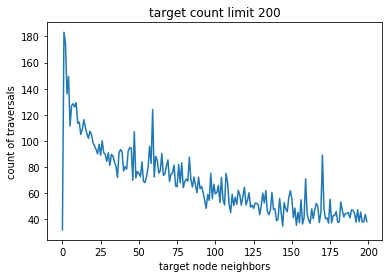

count mean
70.8867356944606
count max
605
--  ---------  ---
 6  0.948722    31
 7  0.863169    36
 8  0.782923    41
 9  0.702488    46
10  0.629399    51
11  0.561496    56
12  0.495876    61
13  0.430981    66
14  0.371736    71
15  0.315384    76
16  0.266555    81
17  0.226407    86
18  0.194353    91
19  0.168974    96
20  0.150138   101
21  0.13656    106
22  0.126654   111
23  0.118644   116
24  0.112262   121
25  0.106107   126
26  0.0998798  131
27  0.0931432  136
28  0.0863291  141
29  0.079105   146
30  0.0716537  151
31  0.0638424  156
32  0.055959   161
--  ---------  ---


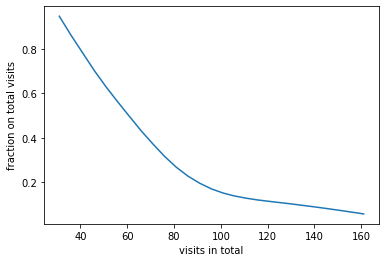

--  ---------  ---
 3  0.930595    16
 4  0.892303    21
 5  0.854659    26
 6  0.819553    31
 7  0.782662    36
 8  0.74273     41
 9  0.713834    46
10  0.678483    51
11  0.648512    56
12  0.620796    61
13  0.58888     66
14  0.557585    71
15  0.532716    76
16  0.506501    81
17  0.48084     86
18  0.461611    91
19  0.437673    96
20  0.412987   101
21  0.394533   106
22  0.372246   111
23  0.353216   116
24  0.337433   121
25  0.307922   126
26  0.290055   131
27  0.272976   136
28  0.258356   141
29  0.244074   146
30  0.230102   151
31  0.213039   156
32  0.19453    161
33  0.179971   166
34  0.16406    171
35  0.148654   176
36  0.130831   181
37  0.113491   186
38  0.0914868  191
39  0.0764458  196
40  0.0621306  201
--  ---------  ---


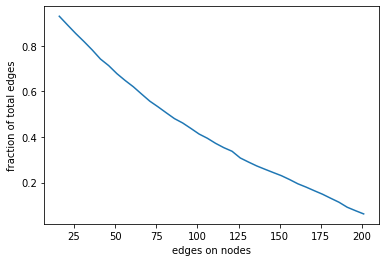

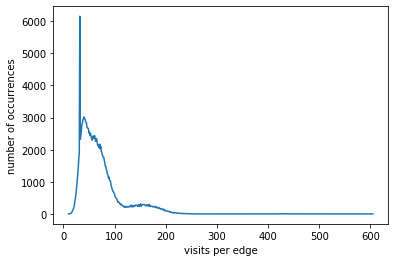

In [66]:
stats_analysis(df_edge_32_100_2_0s)

How many edges had more than X visits in the same step
--  -----------
 0  1
 1  0.0731472
 2  0.00928241
 3  0.0050652
 4  0.00349967
 5  0.00265484
 6  0.0020889
 7  0.00170507
 8  0.00140936
 9  0.00115928
10  0.000974425
11  0.000870813
12  0.000787452
13  0.000707859
14  0.000628737
15  0.000540432
16  0.000472613
17  0.000410563
18  0.000346983
19  0.000324612
20  0.000305774
--  -----------
avg per step
1.0330485638637397
median per step
1.0


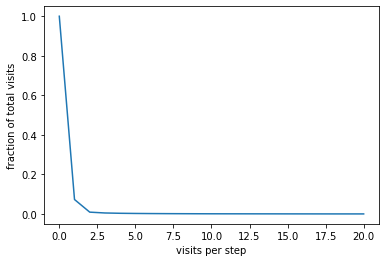

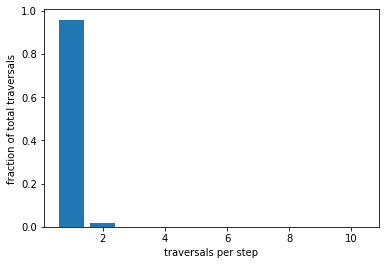

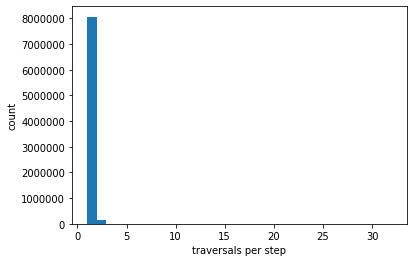

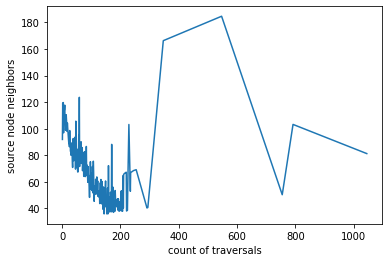

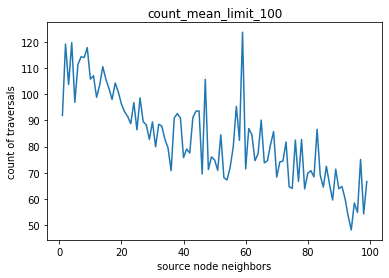

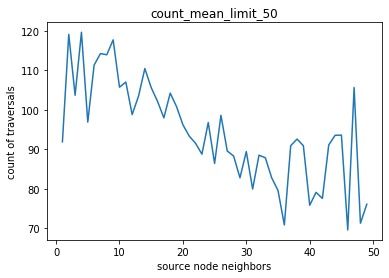

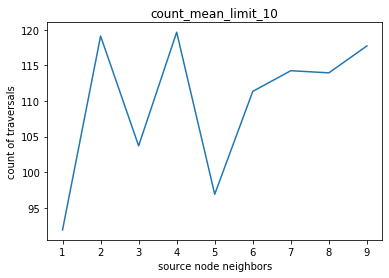

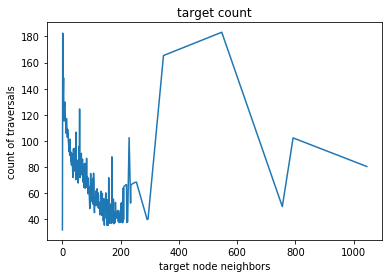

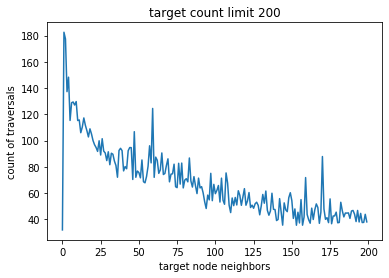

count mean
70.8867356944606
count max
563
--  ---------  ---
 6  0.937842    31
 7  0.85292     36
 8  0.776762    41
 9  0.699474    46
10  0.62612     51
11  0.557917    56
12  0.492579    61
13  0.429402    66
14  0.370019    71
15  0.31724     76
16  0.27051     81
17  0.230783    86
18  0.19879     91
19  0.173312    96
20  0.154958   101
21  0.140731   106
22  0.12964    111
23  0.120865   116
24  0.114062   121
25  0.107442   126
26  0.101015   131
27  0.0942457  136
28  0.0876587  141
29  0.0804456  146
30  0.0727617  151
31  0.0646457  156
32  0.0570781  161
--  ---------  ---


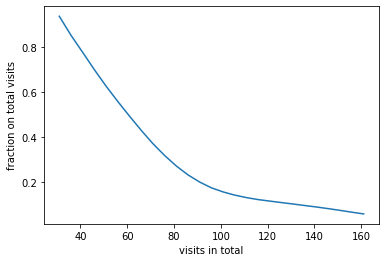

--  ---------  ---
 3  0.930595    16
 4  0.892303    21
 5  0.854659    26
 6  0.819553    31
 7  0.782662    36
 8  0.74273     41
 9  0.713834    46
10  0.678483    51
11  0.648512    56
12  0.620796    61
13  0.58888     66
14  0.557585    71
15  0.532716    76
16  0.506501    81
17  0.48084     86
18  0.461611    91
19  0.437673    96
20  0.412987   101
21  0.394533   106
22  0.372246   111
23  0.353216   116
24  0.337433   121
25  0.307922   126
26  0.290055   131
27  0.272976   136
28  0.258356   141
29  0.244074   146
30  0.230102   151
31  0.213039   156
32  0.19453    161
33  0.179971   166
34  0.16406    171
35  0.148654   176
36  0.130831   181
37  0.113491   186
38  0.0914868  191
39  0.0764458  196
40  0.0621306  201
--  ---------  ---


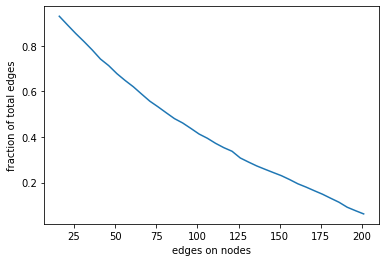

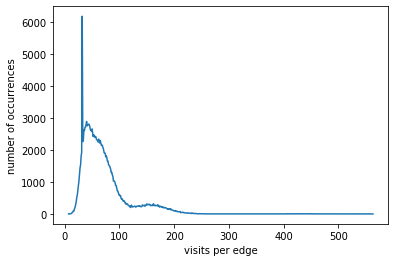

In [67]:
stats_analysis(df_edge_32_100_2_02s)

How many edges had more than X visits in the same step
--  -----------
 0  1
 1  0.146696
 2  0.0186583
 3  0.00666937
 4  0.00389865
 5  0.00275921
 6  0.00211886
 7  0.00168228
 8  0.00140294
 9  0.00116898
10  0.000989105
11  0.000870385
12  0.000763153
13  0.000669616
14  0.000599753
15  0.000542308
16  0.000475462
17  0.000428113
18  0.000373801
19  0.000334112
20  0.000303938
--  -----------
avg per step
1.069970732785488
median per step
1.0


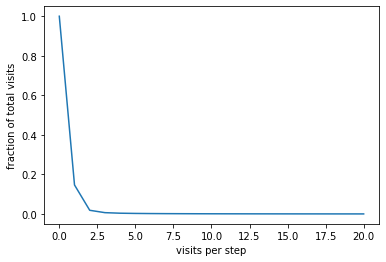

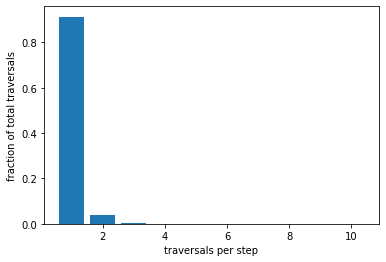

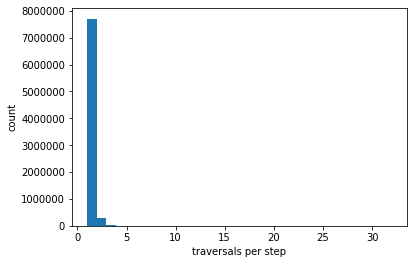

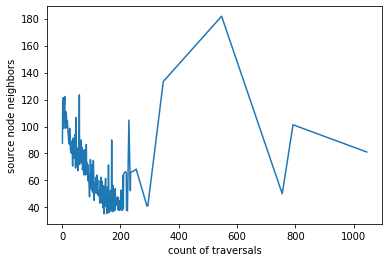

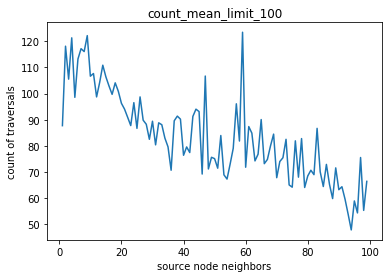

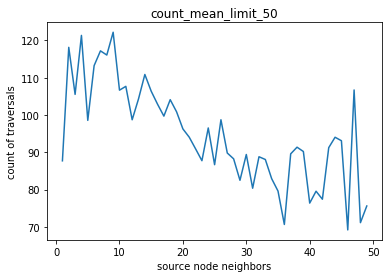

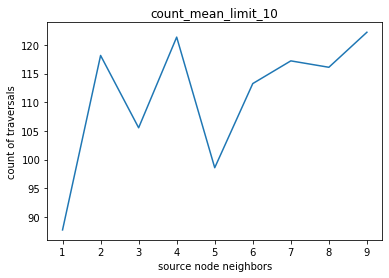

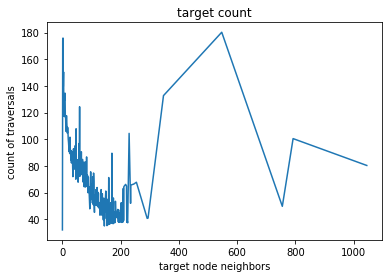

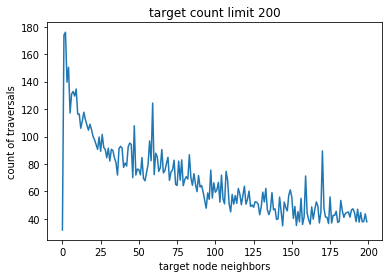

count mean
70.8867356944606
count max
633
--  ---------  ---
 6  0.926978    31
 7  0.844826    36
 8  0.773383    41
 9  0.698749    46
10  0.625948    51
11  0.557901    56
12  0.491865    61
13  0.429906    66
14  0.372911    71
15  0.319168    76
16  0.274516    81
17  0.236024    86
18  0.204014    91
19  0.17873     96
20  0.158897   101
21  0.143972   106
22  0.132072   111
23  0.122156   116
24  0.113785   121
25  0.10635    126
26  0.0993535  131
27  0.0918967  136
28  0.0849552  141
29  0.0772768  146
30  0.0696316  151
31  0.0622801  156
32  0.0552721  161
--  ---------  ---


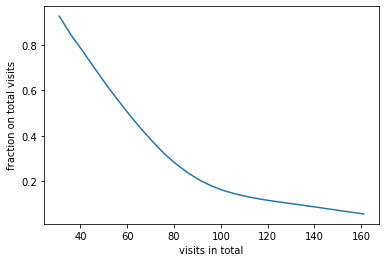

--  ---------  ---
 3  0.930595    16
 4  0.892303    21
 5  0.854659    26
 6  0.819553    31
 7  0.782662    36
 8  0.74273     41
 9  0.713834    46
10  0.678483    51
11  0.648512    56
12  0.620796    61
13  0.58888     66
14  0.557585    71
15  0.532716    76
16  0.506501    81
17  0.48084     86
18  0.461611    91
19  0.437673    96
20  0.412987   101
21  0.394533   106
22  0.372246   111
23  0.353216   116
24  0.337433   121
25  0.307922   126
26  0.290055   131
27  0.272976   136
28  0.258356   141
29  0.244074   146
30  0.230102   151
31  0.213039   156
32  0.19453    161
33  0.179971   166
34  0.16406    171
35  0.148654   176
36  0.130831   181
37  0.113491   186
38  0.0914868  191
39  0.0764458  196
40  0.0621306  201
--  ---------  ---


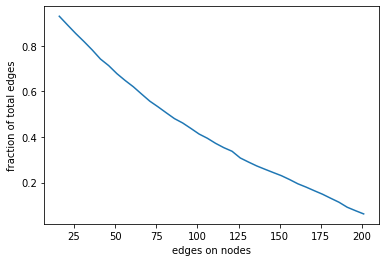

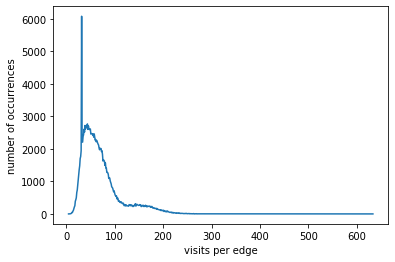

In [68]:
stats_analysis(df_edge_32_100_2_04s)

How many edges had more than X visits in the same step
--  -----------
 0  1
 1  0.257029
 2  0.0473996
 3  0.0144332
 4  0.00632453
 5  0.00361706
 6  0.00243374
 7  0.00182421
 8  0.00144647
 9  0.0011946
10  0.00102021
11  0.000875576
12  0.00077356
13  0.000695519
14  0.000616173
15  0.000536261
16  0.000438326
17  0.000384372
18  0.000335404
19  0.000313868
20  0.000286663
--  -----------
avg per step
1.1385309709913247
median per step
1.0


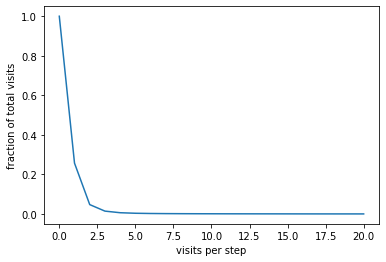

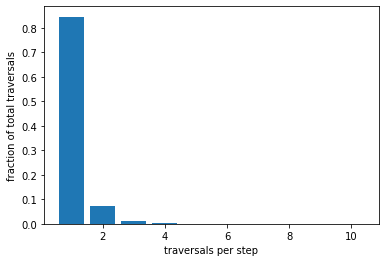

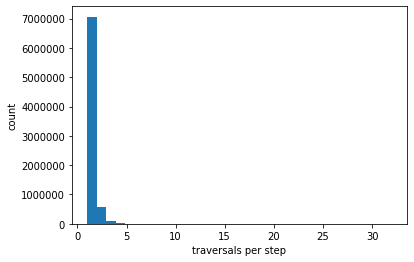

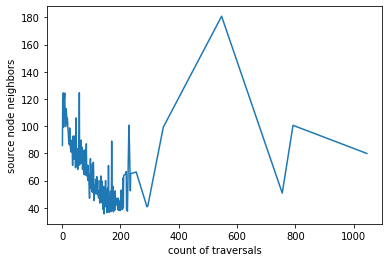

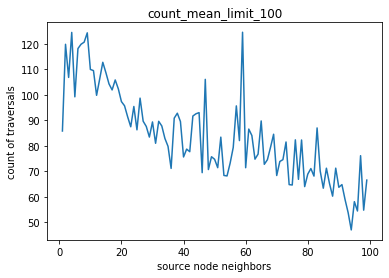

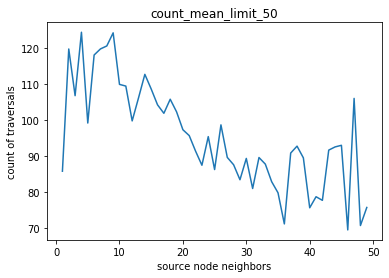

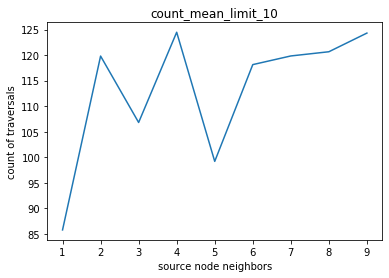

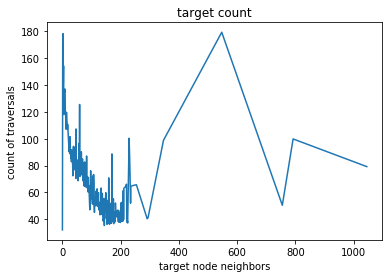

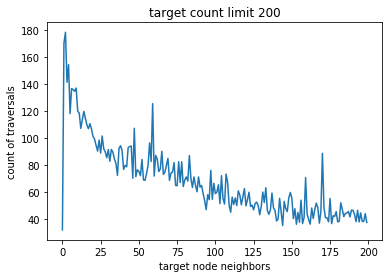

count mean
70.8867356944606
count max
699
--  ---------  ---
 6  0.910812    31
 7  0.831054    36
 8  0.76438     41
 9  0.694738    46
10  0.623317    51
11  0.554416    56
12  0.489898    61
13  0.429069    66
14  0.37408     71
15  0.324359    76
16  0.28015     81
17  0.242029    86
18  0.210014    91
19  0.184447    96
20  0.163617   101
21  0.146692   106
22  0.13302    111
23  0.121807   116
24  0.112406   121
25  0.103769   126
26  0.0960738  131
27  0.0888608  136
28  0.0817531  141
29  0.0749555  146
30  0.0680749  151
31  0.0616375  156
32  0.0553663  161
--  ---------  ---


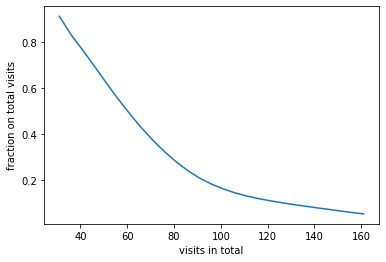

--  ---------  ---
 3  0.930595    16
 4  0.892303    21
 5  0.854659    26
 6  0.819553    31
 7  0.782662    36
 8  0.74273     41
 9  0.713834    46
10  0.678483    51
11  0.648512    56
12  0.620796    61
13  0.58888     66
14  0.557585    71
15  0.532716    76
16  0.506501    81
17  0.48084     86
18  0.461611    91
19  0.437673    96
20  0.412987   101
21  0.394533   106
22  0.372246   111
23  0.353216   116
24  0.337433   121
25  0.307922   126
26  0.290055   131
27  0.272976   136
28  0.258356   141
29  0.244074   146
30  0.230102   151
31  0.213039   156
32  0.19453    161
33  0.179971   166
34  0.16406    171
35  0.148654   176
36  0.130831   181
37  0.113491   186
38  0.0914868  191
39  0.0764458  196
40  0.0621306  201
--  ---------  ---


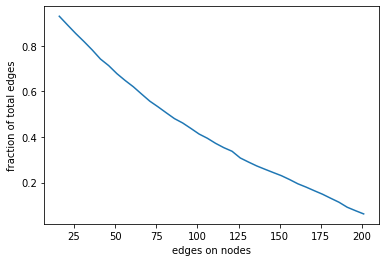

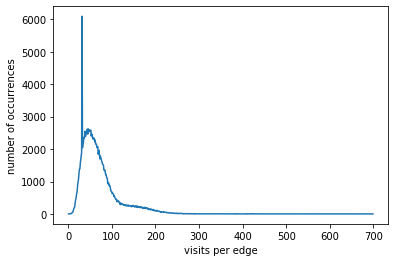

In [69]:
stats_analysis(df_edge_32_100_2_06s)

How many edges had more than X visits in the same step
--  -----------
 0  1
 1  0.452529
 2  0.151649
 3  0.0585012
 4  0.0259563
 5  0.0130554
 6  0.00731745
 7  0.00451853
 8  0.00302518
 9  0.00212754
10  0.0015953
11  0.00123497
12  0.00100812
13  0.000832665
14  0.000708665
15  0.00059358
16  0.000507131
17  0.000417116
18  0.000364598
19  0.000321482
20  0.000276096
--  -----------
avg per step
1.3170190261452055
median per step
1.0


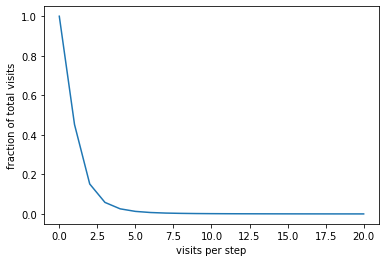

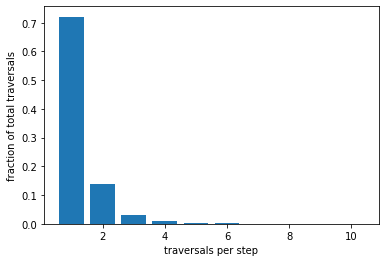

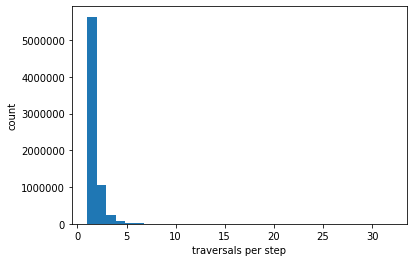

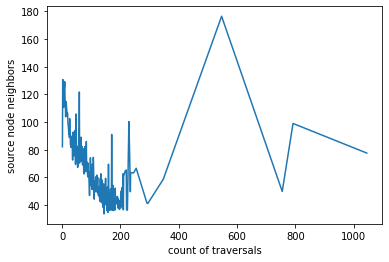

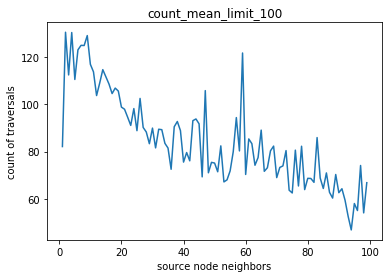

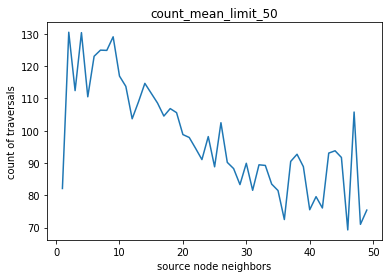

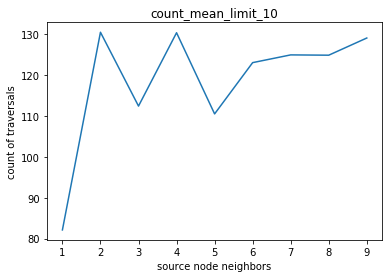

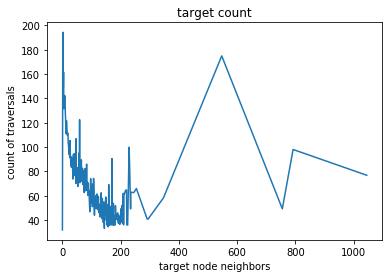

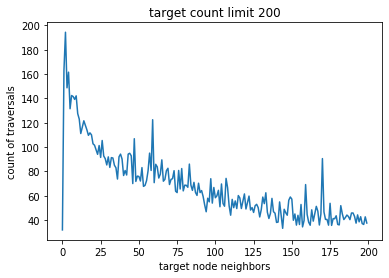

count mean
70.88869929419064
count max
794
--  ---------  ---
 5  0.919613    26
 6  0.873442    31
 7  0.795409    36
 8  0.734352    41
 9  0.670475    46
10  0.606038    51
11  0.543645    56
12  0.483601    61
13  0.428178    66
14  0.377641    71
15  0.332406    76
16  0.291083    81
17  0.256136    86
18  0.226258    91
19  0.200574    96
20  0.178186   101
21  0.159533   106
22  0.144231   111
23  0.130841   116
24  0.118719   121
25  0.10863    126
26  0.0993784  131
27  0.0907137  136
28  0.0828744  141
29  0.0758219  146
30  0.0691959  151
31  0.063135   156
32  0.0568913  161
33  0.0511739  166
--  ---------  ---


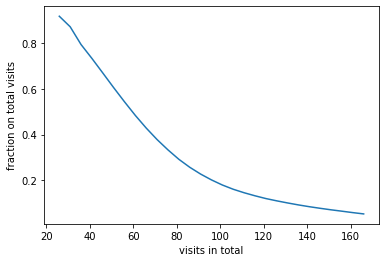

--  ---------  ---
 3  0.930594    16
 4  0.8923      21
 5  0.854655    26
 6  0.819548    31
 7  0.782662    36
 8  0.742734    41
 9  0.713837    46
10  0.678486    51
11  0.648514    56
12  0.620796    61
13  0.58888     66
14  0.557584    71
15  0.53272     76
16  0.506504    81
17  0.480842    86
18  0.461613    91
19  0.437674    96
20  0.412987   101
21  0.394533   106
22  0.372245   111
23  0.353215   116
24  0.337431   121
25  0.307919   126
26  0.290052   131
27  0.272972   136
28  0.258352   141
29  0.244075   146
30  0.230103   151
31  0.213039   156
32  0.19453    161
33  0.17997    166
34  0.164059   171
35  0.148652   176
36  0.13083    181
37  0.113489   186
38  0.0914893  191
39  0.0764479  196
40  0.0621323  201
--  ---------  ---


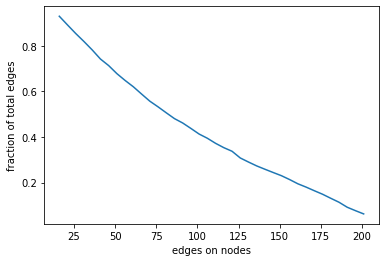

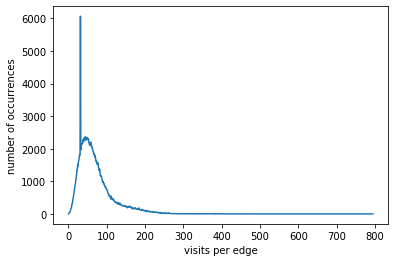

In [70]:
stats_analysis(df_edge_32_100_2_08s)

In [15]:
df = read_df("data/stats_120_80_1.json")
dfe_120_80_1 = extract_stats(df)

--  ----------
 0  1
 1  0.0431653
 2  0.0320198
 3  0.027237
 4  0.0235433
 5  0.0204606
 6  0.0180117
 7  0.0159588
 8  0.0142373
 9  0.0128139
10  0.0115523
11  0.0104392
12  0.00950513
13  0.00870748
14  0.00798958
15  0.007368
16  0.00685986
17  0.00637435
18  0.00591789
19  0.00554094
20  0.00520015
--  ----------
avg per step
1.033759247606491
median per step
1.0


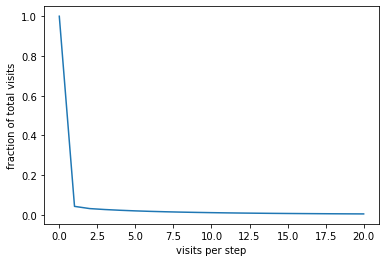

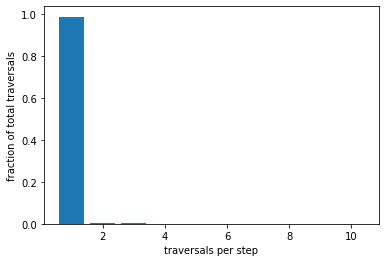

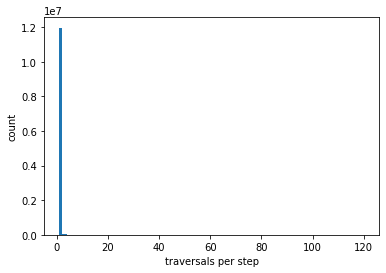

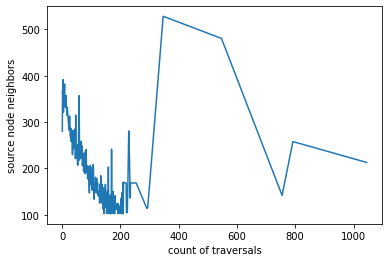

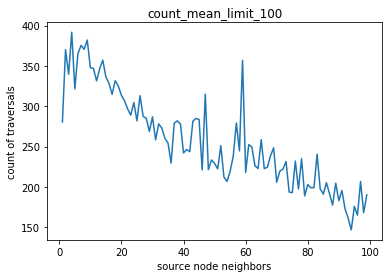

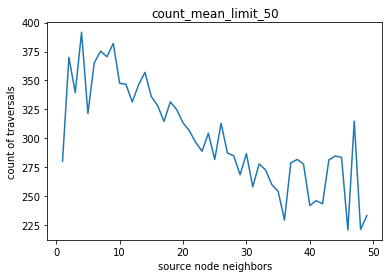

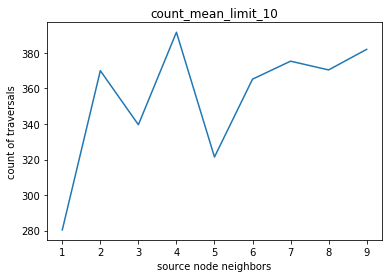

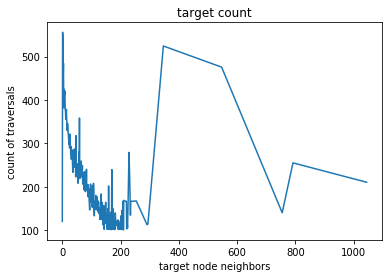

count mean
212.12318635842377
count max
1409
--  ---------  ---
20  0.917034   101
21  0.879617   106
22  0.847945   111
23  0.823586   116
24  0.781781   121
25  0.762896   126
26  0.742841   131
27  0.721667   136
28  0.700521   141
29  0.679298   146
30  0.65762    151
31  0.632867   156
32  0.604176   161
33  0.572083   166
34  0.541663   171
35  0.513592   176
36  0.490928   181
37  0.473832   186
38  0.46078    191
39  0.449052   196
40  0.436836   201
41  0.421485   206
42  0.403525   211
43  0.382528   216
44  0.359521   221
45  0.336209   226
46  0.312769   231
47  0.28939    236
48  0.266051   241
49  0.243558   246
50  0.222224   251
51  0.202585   256
52  0.184946   261
53  0.169534   266
54  0.157512   271
55  0.148238   276
56  0.141485   281
57  0.136338   286
58  0.132937   291
59  0.130322   296
60  0.128388   301
61  0.126527   306
62  0.124965   311
63  0.123774   316
64  0.122588   321
65  0.12163    326
66  0.120677   331
67  0.11984    336
68  0.119137   341
69  0

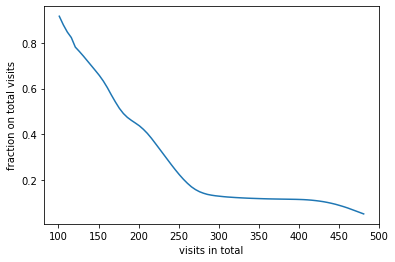

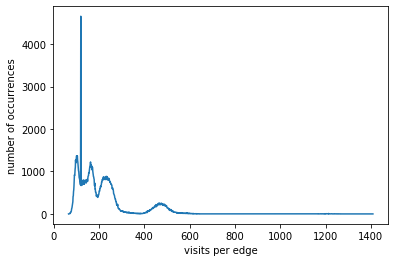

In [30]:
stats_analysis(dfe_120_80_1[0], dfe_120_80_1[1])

In [16]:
stat_analysis2(df_starting_nodes).fillna(0).sum(axis=1) / stat_analysis2(df_starting_nodes).count(axis=1)

(0, 1)        1.817204
(0, 10)       1.693662
(0, 100)      1.654362
(0, 101)      1.825279
(0, 102)      1.903915
                ...   
(999, 916)    1.039735
(999, 925)    1.025316
(999, 947)    1.044586
(999, 966)    1.053571
(999, 968)    1.069892
Length: 176468, dtype: float64

In [18]:
dfc = df_starting_nodes.count(axis=1)

In [22]:
dfc.mean()

172.17763560532222

In [20]:
dfs = df_starting_nodes.fillna(0).sum(axis=1)

In [23]:
dfs.mean()

210.58292154951607

In [52]:
dfc

(0, 1)        279
(0, 10)       284
(0, 100)      298
(0, 101)      269
(0, 102)      281
             ... 
(999, 916)    151
(999, 925)    158
(999, 947)    157
(999, 966)    168
(999, 968)    186
Length: 176468, dtype: int64

In [53]:
dfbc

(0, 1)        279
(0, 10)       284
(0, 100)      298
(0, 101)      269
(0, 102)      281
             ... 
(999, 916)    151
(999, 925)    158
(999, 947)    157
(999, 966)    168
(999, 968)    186
Length: 176468, dtype: int64

In [6]:
df = pd.read_json("data/stats_120_80_1.json")

In [8]:
df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)
df3 = df2.loc[~df2.index.str.contains("None")]
    


In [24]:
df_batches = pd.DataFrame(df3.batch_id.values.tolist(), index=df3.index.values)


In [48]:
dfbc = df_batches.count(axis=1)

In [50]:
dfbc.mean()

172.17763560532222

In [11]:
df_starting_nodes = pd.DataFrame(df3.starting_nodes.values.tolist(), index=df3.index.values)
# df_starting_nodes = df_starting_nodes.fillna(0)

In [ ]:
df = pd.read_json("data/stats.json")

In [ ]:
df1 = pd.read_json("data/stats1.json")

In [ ]:
df128 = pd.read_json("data/stats_20_10_128.json")
df32 = pd.read_json("data/stats_20_10_32.json")
df1 = pd.read_json("data/stats_20_10_1.json")

In [ ]:
df_80_1024 = pd.read_json("data/stats_120_80_1024.json")
df_80_512 = pd.read_json("data/stats_120_80_512.json")
df_80_128 = pd.read_json("data/stats_120_80_128.json")
df_80_64 = pd.read_json("data/stats_120_80_64.json")
df_80_16 = pd.read_json("data/stats_120_80_16.json")
df_80_1 = pd.read_json("data/stats_120_80_1.json")

In [ ]:
df_80_16000 = pd.read_json("data/stats_120_80_16000.json")

In [ ]:
df1 = pd.read_json("data/stats_20_20_1.json")
df16 = pd.read_json("data/stats_20_20_16.json")
df64 = pd.read_json("data/stats_20_20_64.json")

In [ ]:
df_80_131072 = pd.read_json("data/stats_120_80_131072.json")
df_80_65536 = pd.read_json("data/stats_120_80_65536.json")
df_80_2048 = pd.read_json("data/stats_120_80_2048.json")
df_80_512 = pd.read_json("data/stats_120_80_512.json")
df_80_128 = pd.read_json("data/stats_120_80_128.json")
df_80_16 = pd.read_json("data/stats_120_80_16.json")

In [29]:
df_120_80_64 = pd.read_json("data/stats_120_80_64.json")

In [35]:
df_120_80_64.stats

(0, 1)         {'count': 334, 'source_neighbors': 347, 'targe...
(0, 10)        {'count': 415, 'source_neighbors': 347, 'targe...
(0, 100)       {'count': 419, 'source_neighbors': 347, 'targe...
(0, 101)       {'count': 411, 'source_neighbors': 347, 'targe...
(0, 102)       {'count': 601, 'source_neighbors': 347, 'targe...
                                     ...                        
(999, 925)     {'count': 186, 'source_neighbors': 77, 'target...
(999, 947)     {'count': 154, 'source_neighbors': 77, 'target...
(999, 966)     {'count': 183, 'source_neighbors': 77, 'target...
(999, 968)     {'count': 253, 'source_neighbors': 77, 'target...
(999, None)    {'count': 120, 'source_neighbors': 77, 'target...
Name: stats, Length: 180507, dtype: object

In [36]:
df_120_80_64v2 = pd.DataFrame(df_120_80_64.stats.values.tolist(), index=df_120_80_64.index.values)

In [41]:
df_120_80_64v3 = df_120_80_64v2.loc[~df2.index.str.contains("None")]

In [43]:
dfa = df_120_80_64v3['count']/ df_120_80_64v3['target_neighbors']

In [45]:
dfa.mean()

7.364761683968151

In [27]:
df_20_10_1['stats']

(0, 10)        {'count': 1, 'source_neighbors': 347, 'target_...
(0, 102)       {'count': 1, 'source_neighbors': 347, 'target_...
(0, 103)       {'count': 1, 'source_neighbors': 347, 'target_...
(0, 104)       {'count': 1, 'source_neighbors': 347, 'target_...
(0, 107)       {'count': 1, 'source_neighbors': 347, 'target_...
                                     ...                        
(999, 1888)    {'count': 1, 'source_neighbors': 77, 'target_n...
(999, 925)     {'count': 2, 'source_neighbors': 77, 'target_n...
(999, 966)     {'count': 3, 'source_neighbors': 77, 'target_n...
(999, 968)     {'count': 3, 'source_neighbors': 77, 'target_n...
(999, None)    {'count': 20, 'source_neighbors': 77, 'target_...
Name: stats, Length: 146916, dtype: object

In [ ]:
stats_analysis(df1)

In [ ]:
stats_analysis(df_80_131072)

In [ ]:
stats_analysis(df_80_65536)

In [ ]:
stats_analysis(df_80_2048)

In [ ]:
stats_analysis(df_80_512)

In [ ]:
stats_analysis(df_80_128)

In [ ]:
stats_analysis(df_80_16)

In [ ]:
with open("data/stats.json") as datafile:
    data = json.load(datafile)


In [ ]:
df = pd.read_json("data/stats.json")

In [ ]:
df = df128

In [ ]:
df.index.values

In [ ]:
df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)

In [ ]:
df2.loc['(1096, 107)']

In [ ]:
df3 = df2.loc[~df2.index.str.contains("None")]

In [ ]:
df4 = df2.loc[df2.index.str.contains("None")]

In [ ]:
df3

In [ ]:
df3

In [ ]:
df3.time_access.values.tolist()

In [17]:
df_time_access = pd.DataFrame(dfe_120_80_1[1].time_access.values.tolist(), index=dfe_120_80_1[1].index.values)

In [18]:
df3.time_access.values.tolist()

NameError: name 'df3' is not defined

In [19]:
df_time_access = df_time_access.fillna(0)

In [20]:
df_time_access.idxmax()

17    (3980, 4017)
51    (3994, 3982)
2          (0, 11)
4       (414, 642)
19    (1918, 2381)
          ...     
5     (3980, 4001)
42    (3988, 3980)
65    (3982, 4003)
55    (3488, 3557)
52    (3980, 4008)
Length: 78, dtype: object

In [21]:
counts = df_time_access.values.flatten()


In [23]:
df_time_access

,17,51,2,4,19,21,37,57,11,46,...,70,73,75,32,62,5,42,65,55,52
"(0, 1)",1.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(0, 10)",1.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(0, 100)",1.0,1.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(0, 101)",1.0,1.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(0, 102)",1.0,1.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(999, 916)",1.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
"(999, 925)",1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
"(999, 947)",1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(999, 966)",1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


In [24]:
counts

array([1., 1., 7., ..., 1., 1., 1.])

In [25]:
counts2 = counts[(counts>0) & (counts<120)]

In [27]:
counts2==1

array([ True,  True, False, ...,  True,  True,  True])

In [28]:
len(counts2[counts2==1])/len(counts2)

0.989142835972024

In [ ]:
ratios = []
for i in range(1, 11):
    ratios.append(len(counts2[counts2==i])/len(counts2))

In [ ]:
step_groupings = []
for i in range(1, 21):
    step_groupings.append((i, sum(counts2[counts2>i])/sum(counts2)))

In [ ]:
step_groupings = np.array(step_groupings)
l1, l2 = zip(*step_groupings)

In [ ]:
step_groupings

In [ ]:


step_groupings_pd = pd.DataFrame()
step_groupings_pd['bound'] = l1
step_groupings_pd['fraction'] = l2

plt.plot(step_groupings_pd['bound'], step_groupings_pd['fraction'])
plt.xlabel("traversals per step")
plt.ylabel("fraction of total traversals")

In [ ]:
plt.bar(range(1,11), np.array(ratios))
plt.xlabel("traversals per step")
plt.ylabel("fraction of total traversals")

In [ ]:
plt.hist(counts2, bins=int(max(counts2)))
plt.xlabel("traversals per step")
plt.ylabel("count")

In [ ]:
plt.plot(df2.groupby('source_neighbors').mean()['count'])
plt.xlabel("count of traversals")
plt.ylabel("source node neighbors")

In [ ]:
count_mean = df2.groupby('source_neighbors').mean()['count']

In [ ]:
count_mean

In [ ]:
count_mean_limit_100 = count_mean[count_mean.index < 100]
count_mean_limit_50 = count_mean[count_mean.index < 50]
count_mean_limit_10 = count_mean[count_mean.index < 10]

In [ ]:
plt.plot(count_mean_limit_100)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

In [ ]:
plt.plot(count_mean_limit_50)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

In [ ]:
plt.plot(count_mean_limit_10)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

In [ ]:
plt.plot(df2.groupby('target_neighbors').mean()['count'])
plt.ylabel("count of traversals")
plt.xlabel("target node neighbors")

In [ ]:
df2['count'].mean()

In [ ]:
df2['count'].median()

In [ ]:
max(df2['count'])

In [35]:
sn_group = dfe[1].groupby('sn').size()

In [43]:
sn_group

sn
1         75
2        196
3        279
4        396
5        465
        ... 
347      347
547      547
755      755
792      792
1045    1045
Length: 227, dtype: int64

In [50]:
sum(sn_group[sn_group.index >= 50])

122577

In [29]:
dfe[1].groupby('sn')

,c,sn,tn,ta
"(0, 1)",170,347,17,"{'6': 1.0, '47': 1.0, '93': 1.0, '58': 1.0, '8..."
"(0, 10)",130,347,10,"{'31': 1.0, '43': 1.0, '75': 1.0, '77': 1.0, '..."
"(0, 100)",160,347,9,"{'42': 1.0, '4': 1.0, '59': 1.0, '68': 1.0, '2..."
"(0, 101)",165,347,19,"{'64': 1.0, '26': 1.0, '47': 1.0, '40': 1.0, '..."
"(0, 102)",160,347,6,"{'47': 1.0, '88': 1.0, '16': 1.0, '57': 1.0, '..."
...,...,...,...,...
"(999, 916)",38,77,147,"{'81': 1.0, '44': 1.0, '30': 1.0, '38': 1.0, '..."
"(999, 925)",68,77,167,"{'98': 1.0, '49': 1.0, '57': 1.0, '91': 1.0, '..."
"(999, 947)",54,77,115,"{'39': 1.0, '98': 1.0, '84': 1.0, '79': 1.0, '..."
"(999, 966)",47,77,115,"{'33': 1.0, '52': 1.0, '70': 1.0, '36': 1.0, '..."


In [23]:
count_groups = dfe[1].groupby('c').size()


In [41]:
count_groups

c
7      1
8      2
9      2
10     2
11     5
      ..
534    1
535    1
546    2
552    1
563    1
Length: 451, dtype: int64

In [25]:
sum(count_groups) # how many edges there is

176468

In [ ]:
sum(count_groups[count_groups.index >= i]) # how many edges where number of visis were greater than i

In [ ]:
groupings_percentages = []
for i in range(1, max(df2['count']), 5):
    groupings_percentages.append((i, sum(count_groups[count_groups.index >= i])/sum(count_groups)))

In [ ]:
groupings_percentages = np.array(groupings_percentages)
l1, l2 = zip(*groupings_percentages)


In [ ]:
pd_groupings = pd.DataFrame()
pd_groupings['fraction'] = l2
pd_groupings['bound'] = l1

In [ ]:
max(count_groups)

In [ ]:
pd_groupings

In [ ]:
pd_groupings_sig = pd_groupings[(pd_groupings['fraction'] > 0.05) & (pd_groupings['fraction'] < 0.95)]

In [ ]:
pd_groupings_sig

In [ ]:
plt.plot(pd_groupings_sig['bound'], pd_groupings_sig['fraction'])
plt.xlabel("visits in total")
plt.ylabel("fraction on total visits")

In [ ]:
plt.plot(df2.groupby('count').size())

In [ ]:
count_groups = df2.groupby('count').size()
count_groups_500 = count_groups[count_groups < 500]

In [ ]:
count_groups[count_groups < 10]

In [ ]:
bins = range(0, max(df2['count']), 10)
pd.cut(count_groups, bins)

In [ ]:
plt.plot(count_groups_500)

In [ ]:
cut_df = pd.cut(count_groups, bins).to_frame()

In [ ]:
cut_df.groupby(0).size().head(20)

In [ ]:
df_three_32_100_2_0 = read_df("data_exp/three_count_32_100_0.json")
df_three_32_100_2_02 = read_df("data_exp/three_count_32_100_0.2.json")
df_three_32_100_2_04 = read_df("data_exp/three_count_32_100_0.4.json")
df_three_32_100_2_06 = read_df("data_exp/three_count_32_100_0.6.json")
df_three_32_100_2_08 = read_df("data_exp/three_count_32_100_0.8.json")

In [61]:
df_three_32_100_2_0

,data
"(0, 1, 0)",16
"(0, 1, 0, 1)",1
"(0, 1, 0, 103)",1
"(0, 1, 0, 122)",1
"(0, 1, 0, 139)",1
...,...
"(999, 968, 999)",4
"(999, 968, 999, 1291)",1
"(999, 968, 999, 1603)",1
"(999, 968, 999, 1652)",1


In [62]:
df_three_32_100_2_08

,data
"(0, 1, 0)",2
"(0, 1, 0, 1)",2
"(0, 1, 119)",5
"(0, 1, 119, 150)",1
"(0, 1, 119, 188)",3
...,...
"(999, 968, 606, 1070)",1
"(999, 968, 946, 1532)",1
"(999, 968, 999)",6
"(999, 968, 999, 1584)",1
